<a href="https://colab.research.google.com/github/tugcegulsanusta/machine-learning-project/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # explore the data



In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head()


In [ ]:
#count NaN
df.isna().sum()

# clear the data


In [1]:
df = df.dropna(axis = 1)
df = df.drop('id', axis= 1)
df.shape
df.head()

NameError: ignored

In [ ]:
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df['diagnosis'] = df['diagnosis'].replace(['M'], '1')
df['diagnosis'] = df['diagnosis'].replace(['B'], '0')
df['diagnosis'] = df['diagnosis'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

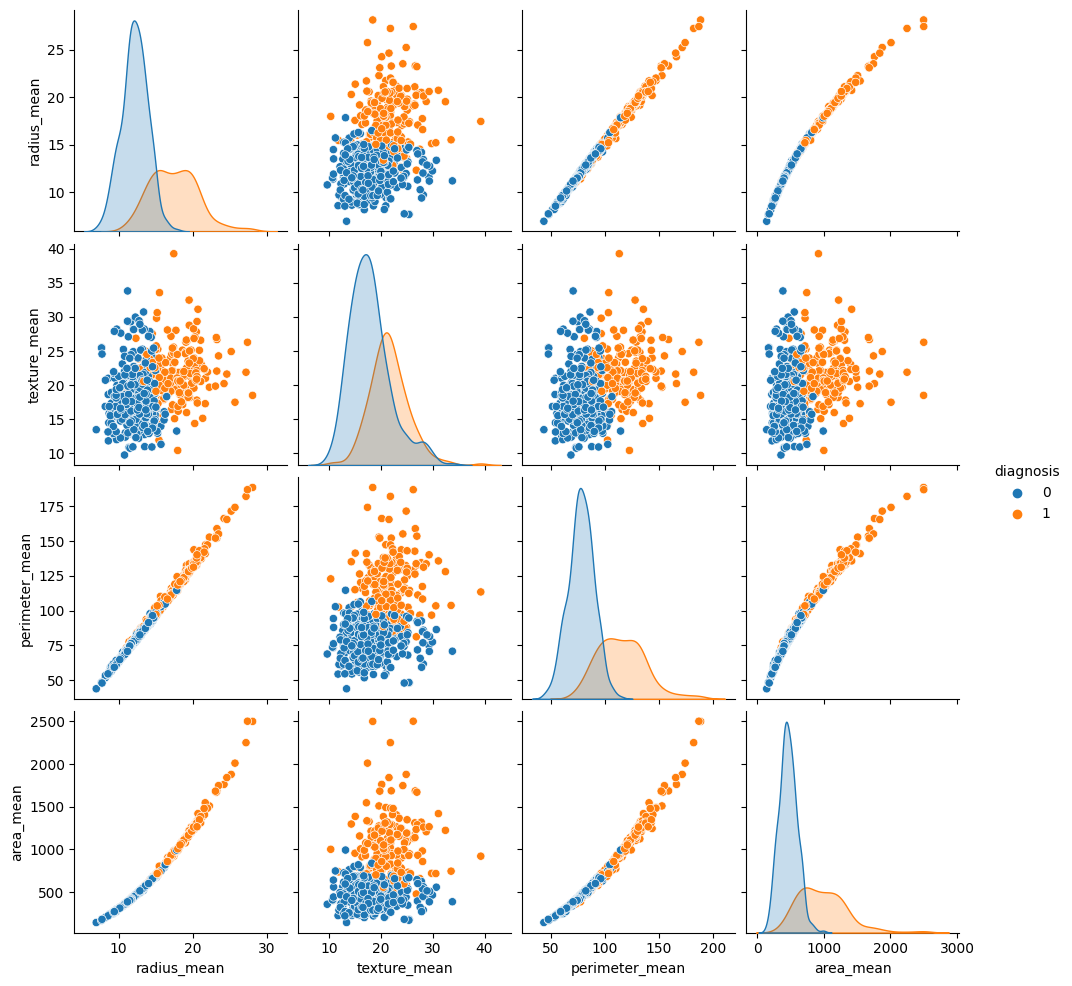

In [ ]:
sns.pairplot(df.iloc[:, 0:5], hue = 'diagnosis')

In [ ]:
#calculate correlation between columns
df.iloc[:, 0:31].corr()

In [ ]:
df.corr()['diagnosis'].sort_values()

<Axes: >

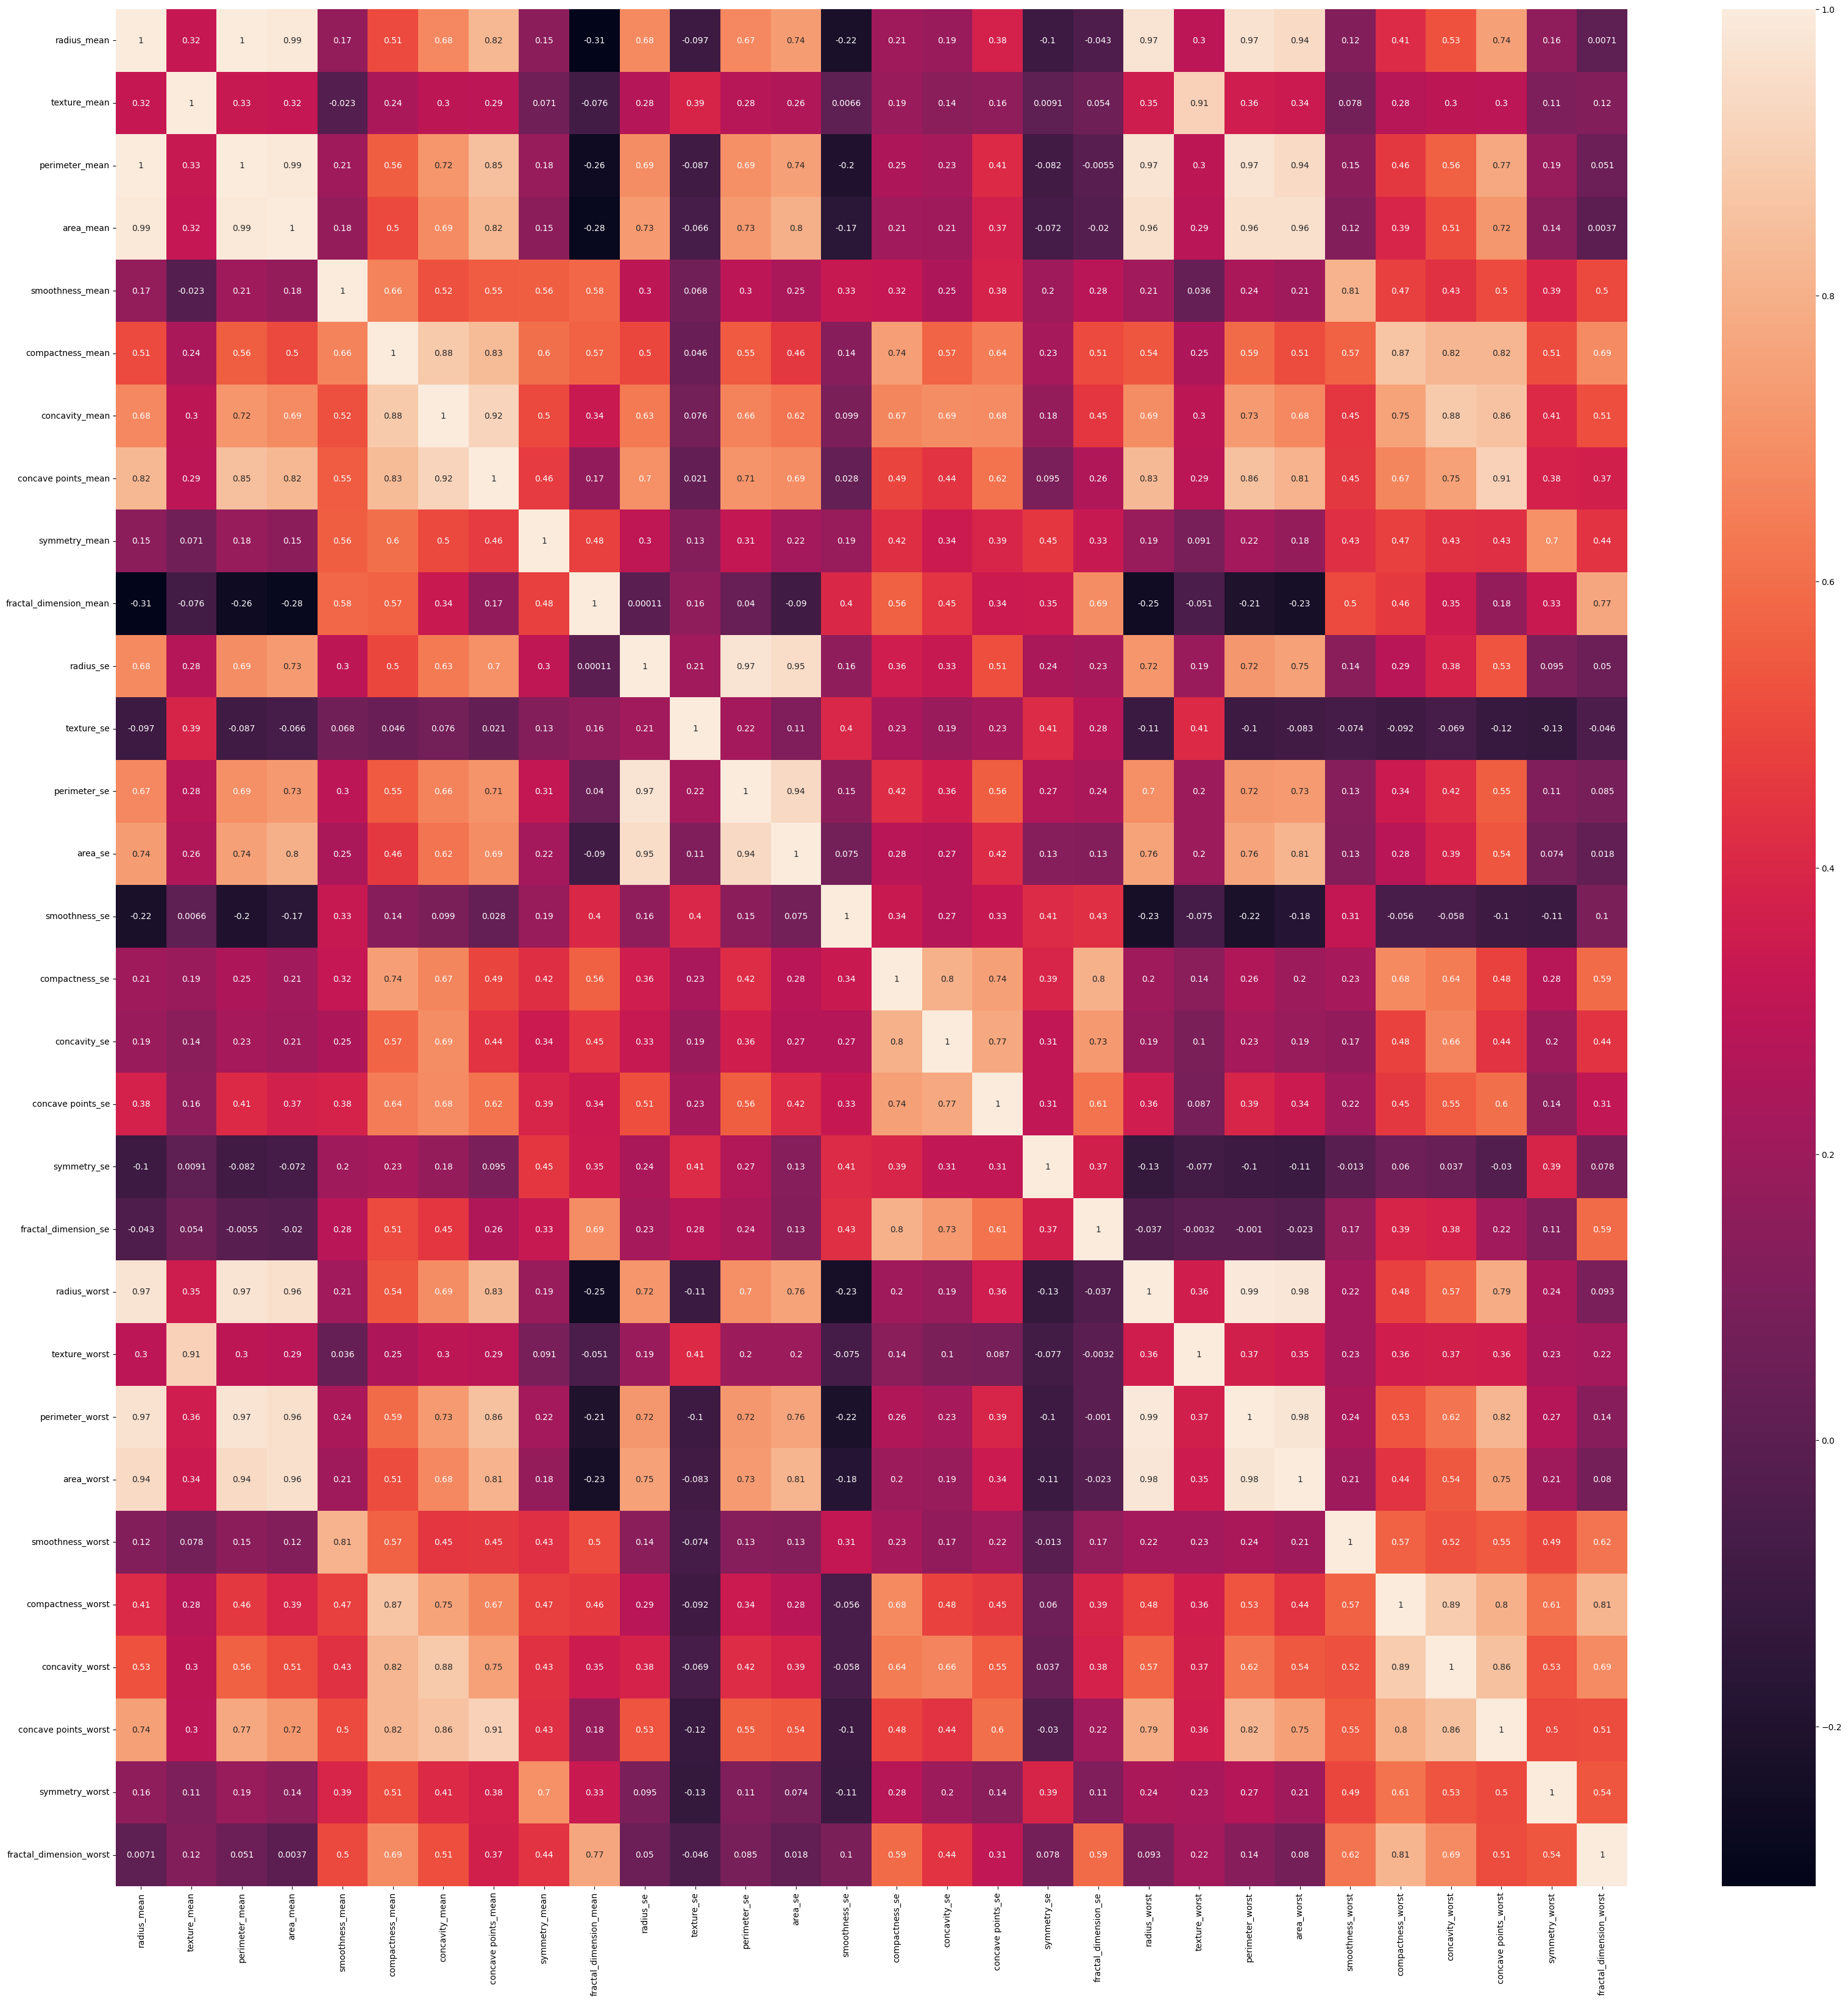

In [ ]:
plt.figure(figsize = (40,40))
sns.heatmap(df.iloc[:, 1: 31].corr(), annot = True)

In [ ]:
X = df.iloc[:, 2:31].values
Y = df.iloc[:, 1].values
Y = Y.astype('int')
print(X.shape, Y.shape)

(569, 29) (569,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size= 0.30, random_state = 7)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  # Set up a KNN Classifier
  knn = KNeighborsClassifier(n_neighbors=neighbor)

  # Fit the model
  knn.fit(X_train, Y_train)

  # Compute accuracy
  train_accuracies[neighbor] = knn.score(X_train, Y_train)
  test_accuracies[neighbor] = knn.score(X_test, Y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.914572864321608, 3: 0.9195979899497487, 4: 0.8819095477386935, 5: 0.8919597989949749, 6: 0.8592964824120602, 7: 0.8417085427135679, 8: 0.8291457286432161, 9: 0.8266331658291457, 10: 0.8140703517587939, 11: 0.8266331658291457, 12: 0.8040201005025126} 
 {1: 0.8187134502923976, 2: 0.8245614035087719, 3: 0.8070175438596491, 4: 0.847953216374269, 5: 0.8070175438596491, 6: 0.8128654970760234, 7: 0.8011695906432749, 8: 0.7953216374269005, 9: 0.7719298245614035, 10: 0.7719298245614035, 11: 0.7953216374269005, 12: 0.7894736842105263}


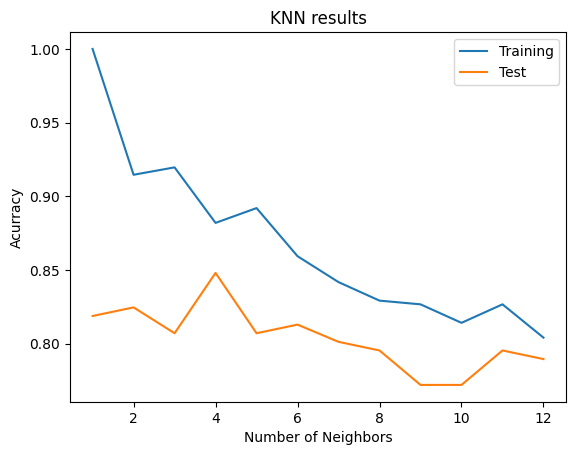

In [ ]:
#plot the KNN results
plt.title('KNN results')
plt.plot(neighbors, train_accuracies.values(), label = 'Training' )
plt.plot(neighbors, test_accuracies.values(), label = 'Test')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Acurracy')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
def models(X_train, Y_train):
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 1)
  log.fit(X_train, Y_train)

  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state= 1)
  tree.fit(X_train, Y_train)

  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state= 1)
  forest.fit(X_train, Y_train)
  print('Log', log.score(X_train, Y_train))
  print('Des', tree.score(X_train, Y_train))
  print('Forst', forest.score(X_train, Y_train))
  return log, tree, forest

In [ ]:
model = models(X_train, Y_train)
print(model)

Log 0.6708542713567839
Des 1.0
Forst 0.9949748743718593
(LogisticRegression(random_state=1), DecisionTreeClassifier(criterion='entropy', random_state=1), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#burda 0 yaptım, 1 ile sonuç daha kötü TP, FP, TN, FN
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model[1].predict(X_test))

print(cm)

print('accuracy: ' , (cm[0][0] + cm[1][1])/ (cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  )

[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19 11  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5 15  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  6  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  5  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  5  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0